In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# upload the dataset
hyper= pd.read_csv("health_data.csv")
hyper

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,1.0,1.0,0.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0


In [3]:
hyper.shape


(70692, 18)

In [4]:
# convert feature to integer
hyper =hyper.astype(int)
hyper

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1,0
1,12,1,1,1,26,1,0,0,1,0,0,3,0,0,0,0,1,1
2,13,1,0,1,26,0,0,1,1,1,0,1,0,10,0,0,0,0
3,11,1,1,1,28,1,0,1,1,1,0,3,0,3,0,0,1,0
4,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6,0,1,1,37,0,0,0,0,1,0,4,0,0,0,1,0,0
70688,10,1,1,1,29,1,1,0,1,1,0,2,0,0,1,1,0,0
70689,13,0,1,1,25,0,1,0,1,0,0,5,15,0,1,1,1,0
70690,11,0,1,1,18,0,0,0,0,0,0,4,0,0,1,1,1,0


In [5]:
#listing all the columns
hyper.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Diabetes', 'Hypertension', 'Stroke'],
      dtype='object')

In [6]:
hyper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   70692 non-null  int32
 1   Sex                   70692 non-null  int32
 2   HighChol              70692 non-null  int32
 3   CholCheck             70692 non-null  int32
 4   BMI                   70692 non-null  int32
 5   Smoker                70692 non-null  int32
 6   HeartDiseaseorAttack  70692 non-null  int32
 7   PhysActivity          70692 non-null  int32
 8   Fruits                70692 non-null  int32
 9   Veggies               70692 non-null  int32
 10  HvyAlcoholConsump     70692 non-null  int32
 11  GenHlth               70692 non-null  int32
 12  MentHlth              70692 non-null  int32
 13  PhysHlth              70692 non-null  int32
 14  DiffWalk              70692 non-null  int32
 15  Diabetes              70692 non-null  int32
 16  Hype

In [7]:
#checking for unique values
hyper.nunique()

Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Diabetes                 2
Hypertension             2
Stroke                   2
dtype: int64

In [8]:
#check for null values
hyper.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Diabetes                0
Hypertension            0
Stroke                  0
dtype: int64

In [9]:
# features selection
hyper=hyper[['Age', 'BMI', 'Sex', 'Smoker', 'PhysActivity','Fruits', 'Veggies', 'HvyAlcoholConsump', 'Hypertension']]
hyper

,Age,BMI,Sex,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Hypertension
0,4,26,1,0,1,0,1,0,1
1,12,26,1,1,0,1,0,0,1
2,13,26,1,0,1,1,1,0,0
3,11,28,1,1,1,1,1,0,1
4,8,29,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...
70687,6,37,0,0,0,0,1,0,0
70688,10,29,1,1,0,1,1,0,0
70689,13,25,0,0,0,1,0,0,1
70690,11,18,0,0,0,0,0,0,1


In [10]:
#Renaming some columns
new_hyper= hyper.rename({'PhysActivity':'Physical Activity', 'HvyAlcoholConsump':'Alchool'}, axis=1)
new_hyper

,Age,BMI,Sex,Smoker,Physical Activity,Fruits,Veggies,Alchool,Hypertension
0,4,26,1,0,1,0,1,0,1
1,12,26,1,1,0,1,0,0,1
2,13,26,1,0,1,1,1,0,0
3,11,28,1,1,1,1,1,0,1
4,8,29,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...
70687,6,37,0,0,0,0,1,0,0
70688,10,29,1,1,0,1,1,0,0
70689,13,25,0,0,0,1,0,0,1
70690,11,18,0,0,0,0,0,0,1


In [11]:
# Cumulative statistics description
new_hyper.describe()

,Age,BMI,Sex,Smoker,Physical Activity,Fruits,Veggies,Alchool,Hypertension
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,29.856985,0.456997,0.475273,0.703036,0.611795,0.788774,0.042721,0.563458
std,2.852153,7.113954,0.498151,0.499392,0.456924,0.487345,0.408181,0.202228,0.495960
min,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,9.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,11.000000,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,13.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# unique value for the new subset of the dataset
new_hyper.nunique()

Age                  13
BMI                  80
Sex                   2
Smoker                2
Physical Activity     2
Fruits                2
Veggies               2
Alchool               2
Hypertension          2
dtype: int64

In [13]:
#Correlation bethween the numerical variables
correlation = new_hyper.corr()
correlation

,Age,BMI,Sex,Smoker,Physical Activity,Fruits,Veggies,Alchool,Hypertension
Age,1.000000,-0.038648,-0.002315,0.105424,-0.100753,0.061096,-0.018893,-0.057705,0.338132
BMI,-0.038648,1.000000,0.000827,0.011551,-0.170936,-0.084505,-0.056528,-0.058232,0.241019
Sex,-0.002315,0.000827,1.000000,0.112125,0.051753,-0.088723,-0.052604,0.014164,0.040819
Smoker,0.105424,0.011551,0.112125,1.000000,-0.079823,-0.074811,-0.029926,0.077835,0.087438
Physical Activity,-0.100753,-0.170936,0.051753,-0.079823,1.000000,0.133813,0.149322,0.019111,-0.136102
Fruits,0.061096,-0.084505,-0.088723,-0.074811,0.133813,1.000000,0.238605,-0.033246,-0.040852
Veggies,-0.018893,-0.056528,-0.052604,-0.029926,0.149322,0.238605,1.000000,0.022090,-0.066624
Alchool,-0.057705,-0.058232,0.014164,0.077835,0.019111,-0.033246,0.022090,1.000000,-0.027030
Hypertension,0.338132,0.241019,0.040819,0.087438,-0.136102,-0.040852,-0.066624,-0.027030,1.000000


<AxesSubplot:>

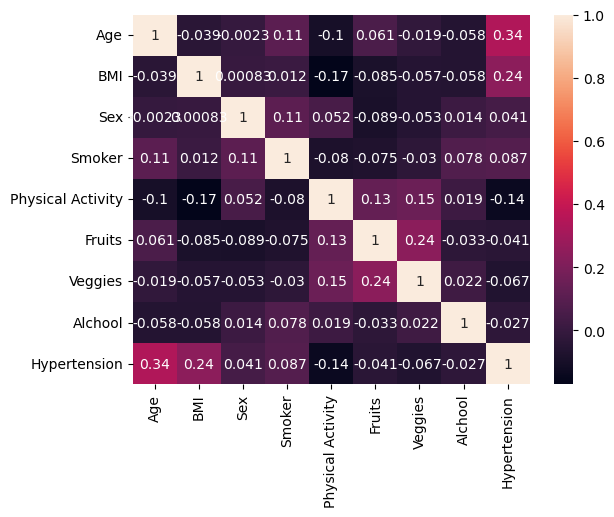

In [14]:
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

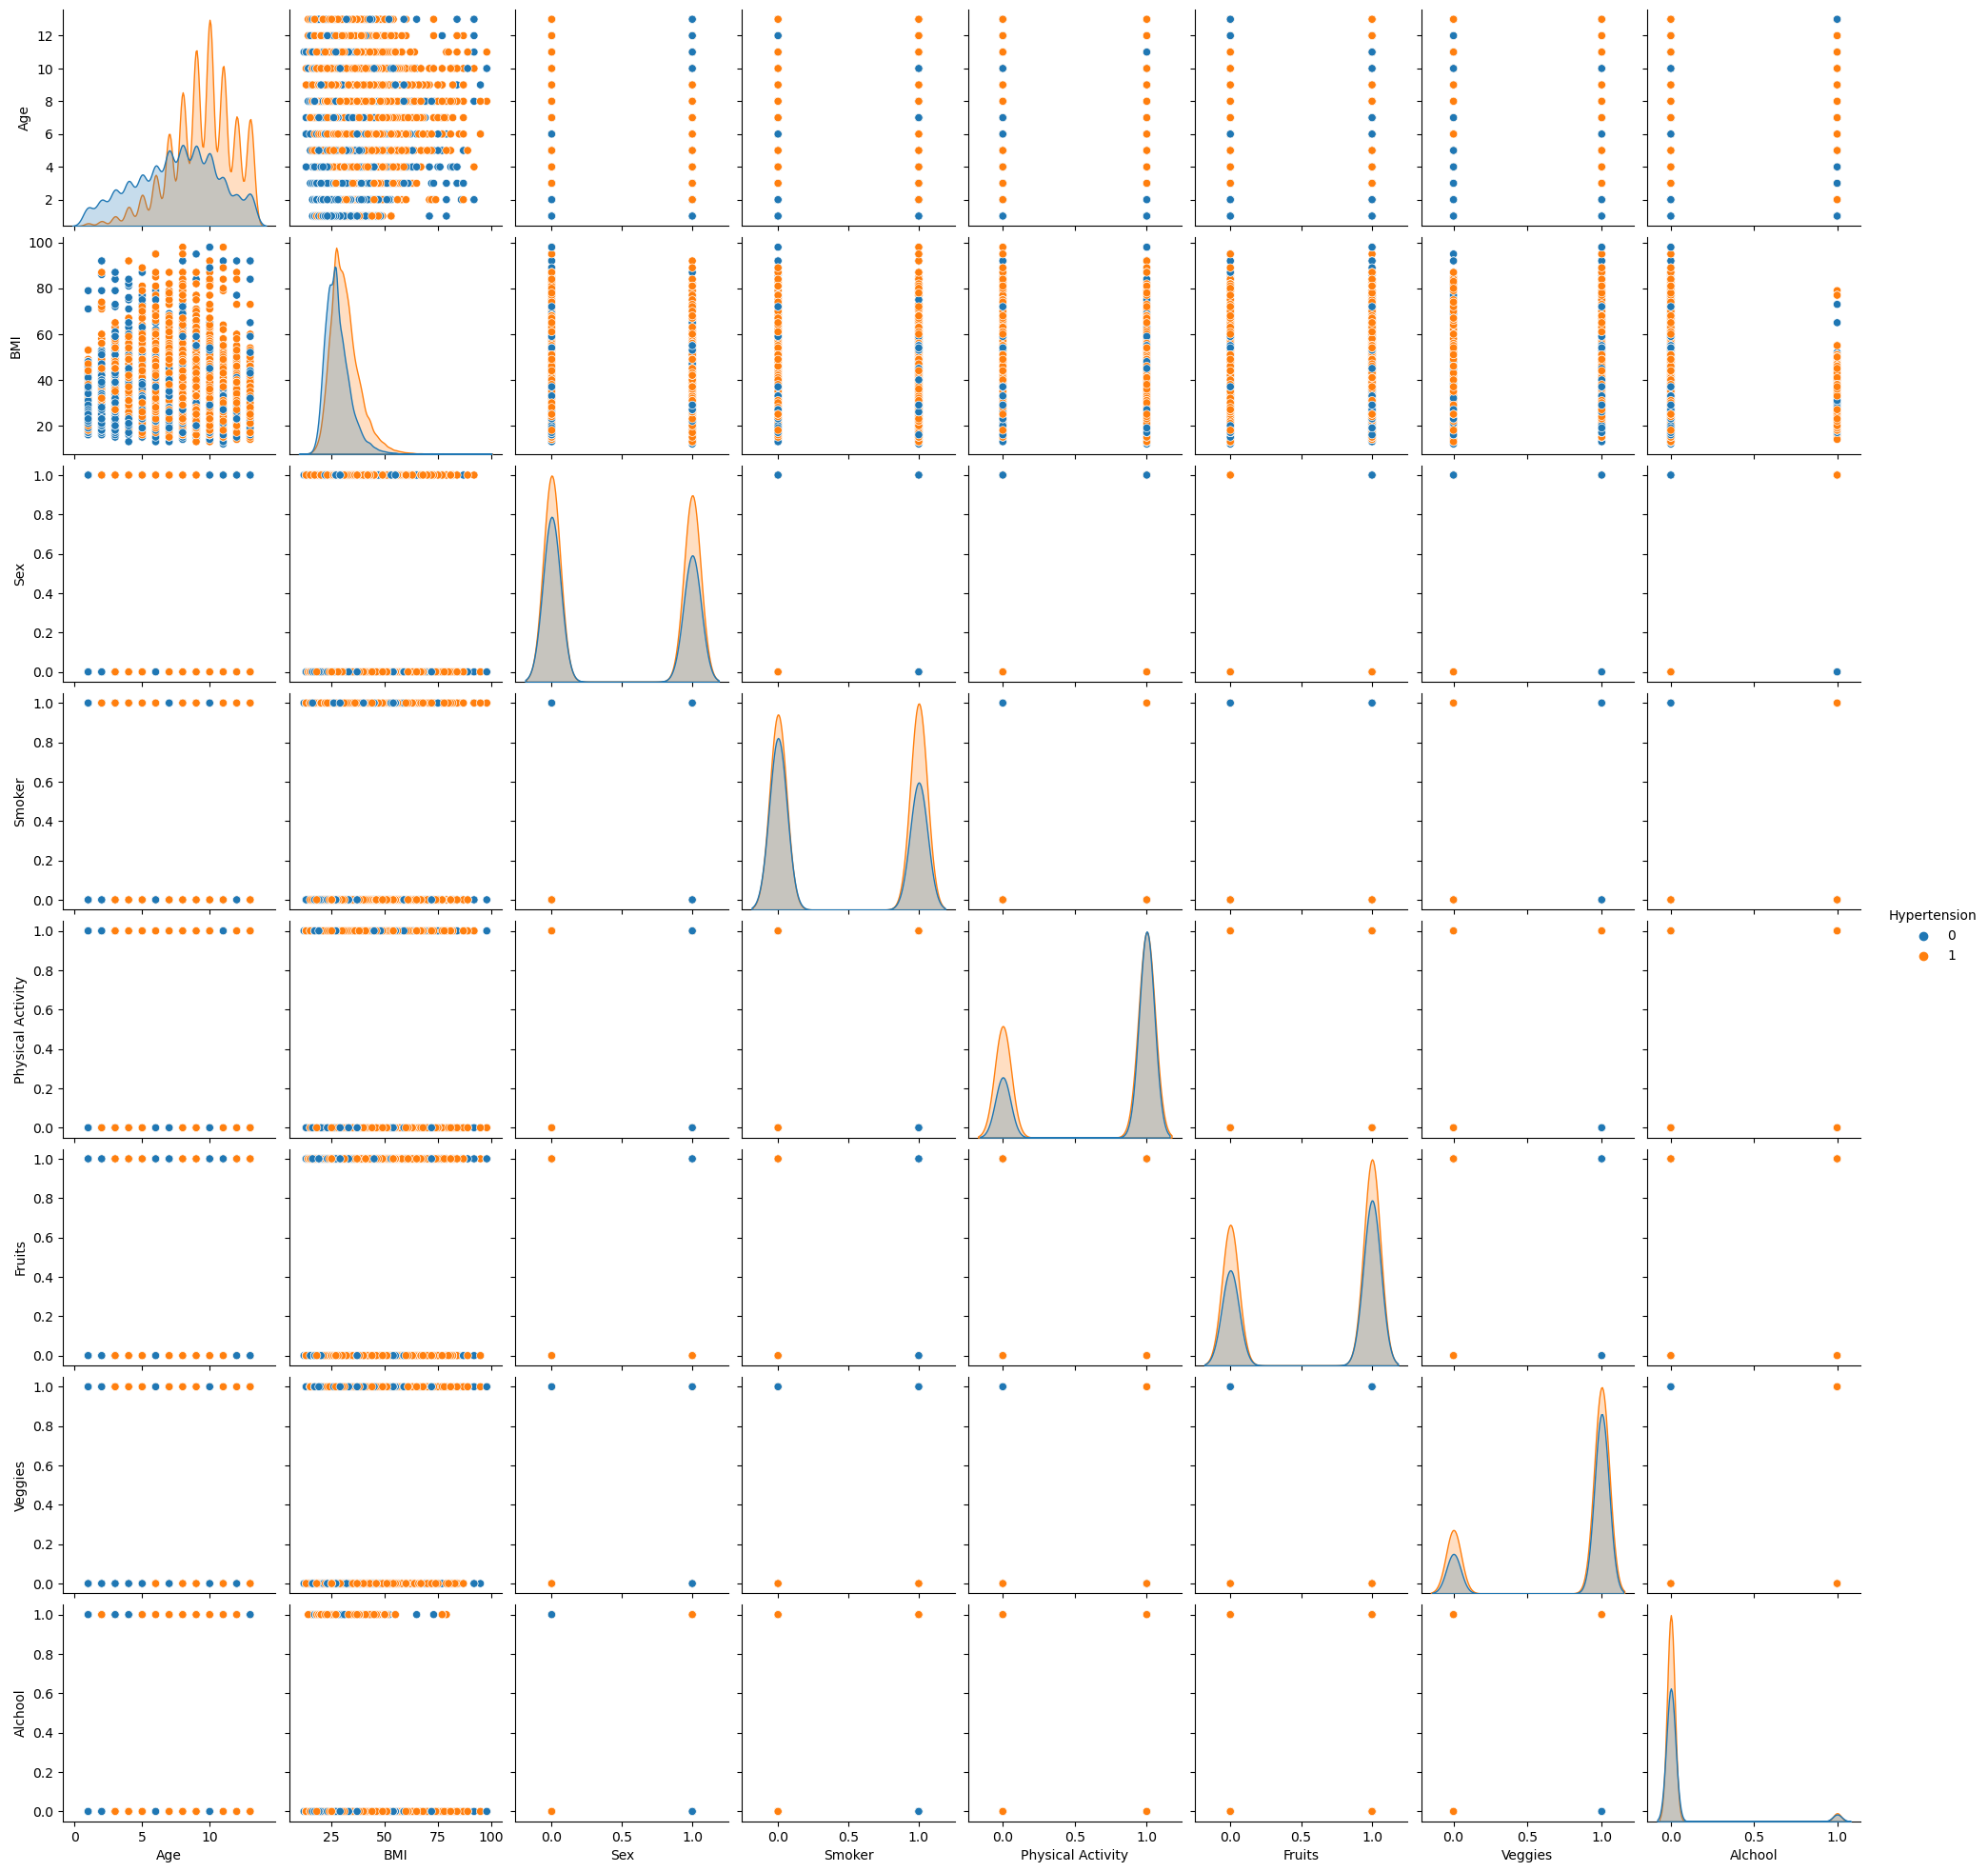

In [15]:
#bivariate pairplot
sns.pairplot(new_hyper, hue='Hypertension')

In [16]:
# case of hypertension counted
new_hyper['Hypertension'].value_counts()

1    39832
0    30860
Name: Hypertension, dtype: int64

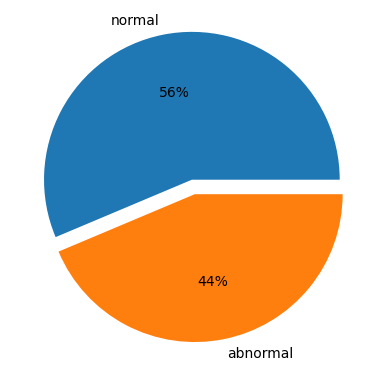

In [17]:
#declaring data
data = new_hyper['Hypertension'].value_counts()
keys = ['normal', 'abnormal']
explode = [0.1, 0.0]
# plotting data on chart
plt.pie(data, labels=keys,explode=explode,autopct='%.0f%%')
# displaying chart
plt.show()

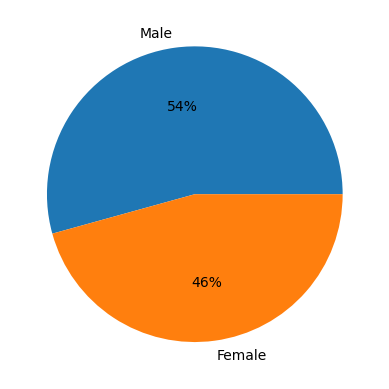

In [18]:
#declaring data
data = new_hyper['Sex'].value_counts()
keys = ['Male', 'Female']
explode = [0, 0,]
# plotting data on chart
plt.pie(data, labels=keys,explode=explode,autopct='%.0f%%')
# displaying chart
plt.show()

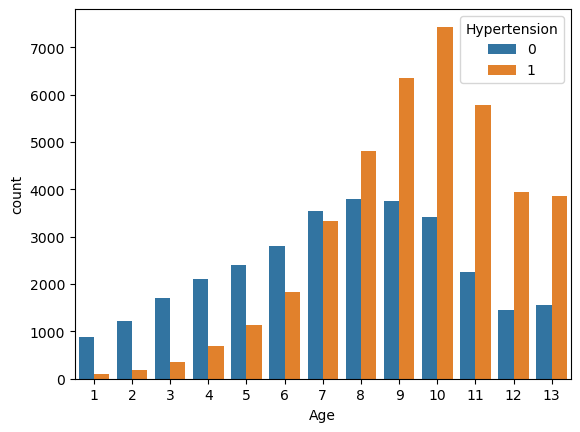

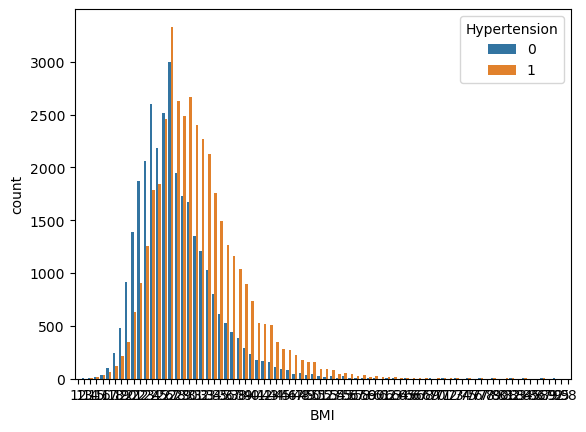

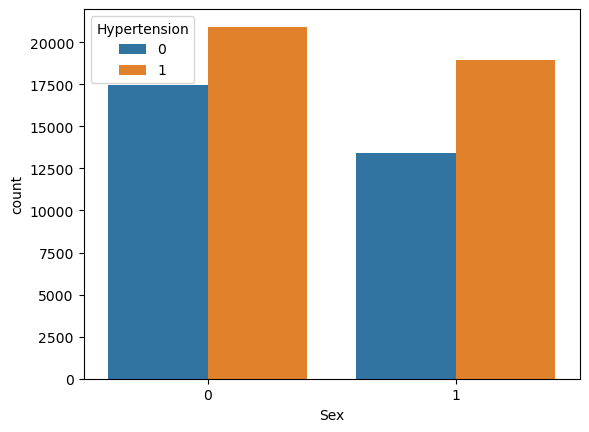

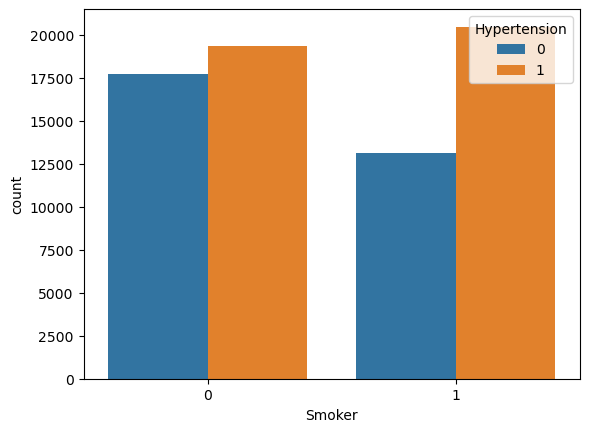

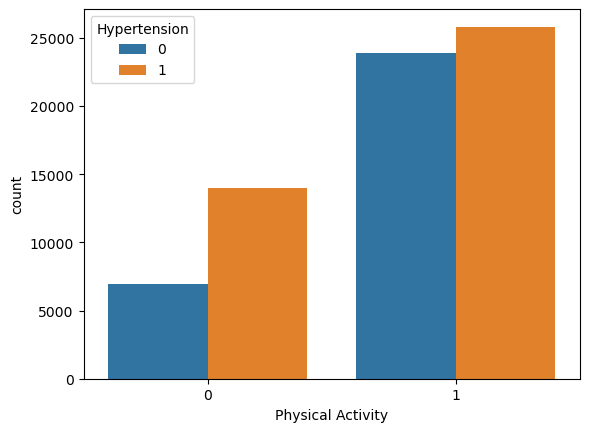

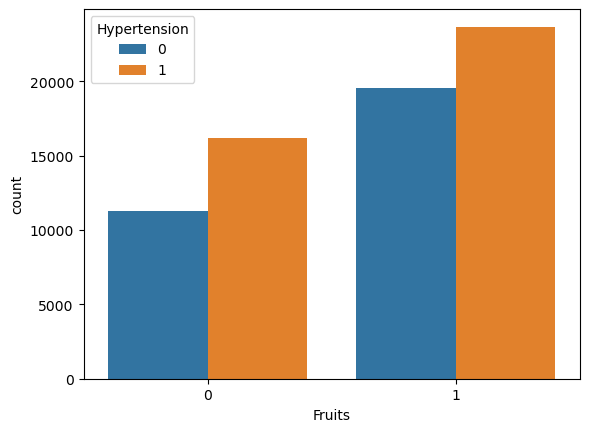

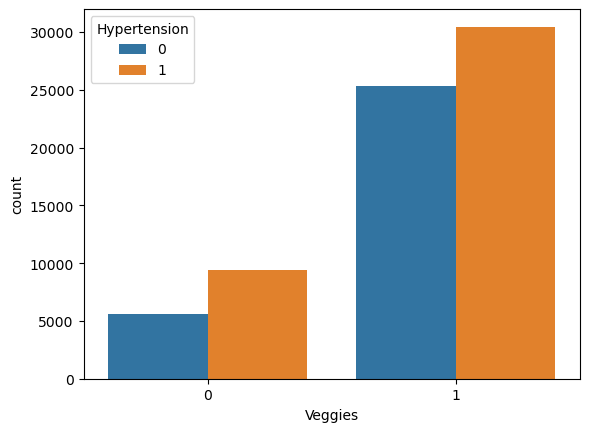

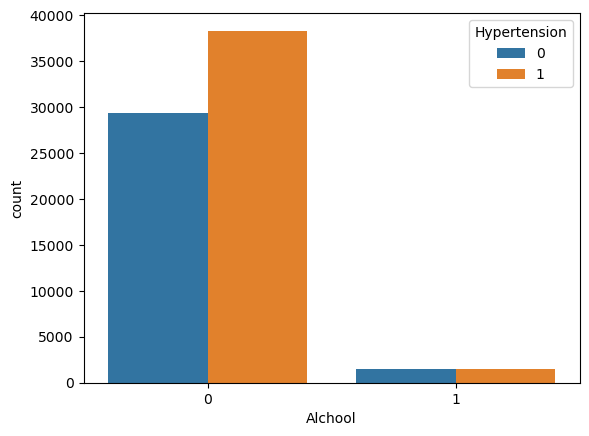

In [19]:

for i, predictor in enumerate(new_hyper.drop(columns=['Hypertension'])):
    plt.figure(i)
    sns.countplot(data=new_hyper, x=predictor, hue='Hypertension')
# for i, predictor in enumerate(hyper.drop(columns=['Blood_Pressure_Abnormality', 'Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Pregnancy', 'Physical_activity', 'salt_content_in_the_diet', 'alcohol_consumption_per_day', 'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'])):
#     plt.figure(i)
#     sns.countplot(data=hyper, x=predictor, hue='Blood_Pressure_Abnormality')

In [20]:
X = new_hyper.drop("Hypertension", axis=1)
y = new_hyper["Hypertension"]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
X_train

,Age,BMI,Sex,Smoker,Physical Activity,Fruits,Veggies,Alchool
61789,11,25,1,0,1,0,1,0
46280,11,27,0,1,0,0,0,0
18465,8,27,0,1,1,0,0,0
45540,12,25,0,0,1,0,0,0
28119,5,26,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...
37194,11,28,1,1,0,1,1,0
6265,9,25,1,0,1,1,1,0
54886,11,23,0,0,1,1,1,0
860,10,28,1,1,0,1,1,0


In [23]:
X_test

,Age,BMI,Sex,Smoker,Physical Activity,Fruits,Veggies,Alchool
44967,10,23,0,1,1,0,1,0
20220,13,33,0,1,0,1,1,0
23944,8,27,1,1,1,1,1,0
2707,7,29,1,1,0,1,0,0
42356,6,47,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...
59313,13,20,0,0,1,1,1,0
44805,11,27,0,0,0,1,1,0
30661,8,28,1,0,0,1,1,0
30295,13,19,0,0,1,1,1,0


In [24]:
X_test.shape

(14139, 8)

In [25]:
y_train

61789    1
46280    1
18465    1
45540    0
28119    1
        ..
37194    1
6265     1
54886    1
860      1
15795    0
Name: Hypertension, Length: 56553, dtype: int32

In [26]:
y_test

44967    0
20220    0
23944    1
2707     0
42356    1
        ..
59313    1
44805    1
30661    0
30295    1
30199    0
Name: Hypertension, Length: 14139, dtype: int32

In [27]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [28]:
# X_train_std=std.fit_transform(X_train)
# X_test_std=std.transform(X_test)

In [29]:
# X_train_std

In [30]:
#creating the model
model_log=LogisticRegression()
# Train the model
model_log.fit(X_train, y_train)
model_log

LogisticRegression()

In [31]:
pred= model_log.predict(X_test)
pred

array([1, 1, 0, ..., 1, 1, 1])

In [32]:
#calculate the accuracy
print (accuracy_score(y_test, pred)*100)

69.87764339769433


In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.69      0.57      0.62      6156
           1       0.71      0.80      0.75      7983

    accuracy                           0.70     14139
   macro avg       0.70      0.68      0.69     14139
weighted avg       0.70      0.70      0.69     14139



In [34]:
# creating KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
#training the model
knn.fit(X_train, y_train)
knn

KNeighborsClassifier()

In [35]:
#Prediction on the test data
k_pred=knn.predict(X_test)
k_pred

array([1, 0, 0, ..., 1, 1, 1])

In [36]:
#using confusion matrix to check the prediction
cmat1=confusion_matrix(y_test, k_pred)
print(cmat1)

[[3465 2691]
 [2156 5827]]


In [114]:
#check the accuracy of the KNN model
print(classification_report(y_test, k_pred))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59      6156
           1       0.68      0.73      0.71      7983

    accuracy                           0.66     14139
   macro avg       0.65      0.65      0.65     14139
weighted avg       0.65      0.66      0.65     14139



In [62]:
 #creating decision tree model 
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion = "gini",random_state = 42,max_depth=6, min_samples_leaf=8)
#training the model
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=42)

In [63]:
#Prediction on the test data
tree_pred=tree.predict(X_test)
tree_pred

array([0, 1, 0, ..., 1, 1, 1])

In [64]:
#using confusion matrix to check the prediction
cmat2=confusion_matrix(y_test,tree_pred)
print(cmat2)

[[3216 2940]
 [1409 6574]]


In [61]:
#check the accuracy of the decision tree model
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.70      0.52      0.60      6156
           1       0.69      0.82      0.75      7983

    accuracy                           0.69     14139
   macro avg       0.69      0.67      0.67     14139
weighted avg       0.69      0.69      0.68     14139



In [55]:
#creating random forest model 
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42,max_depth=6, min_samples_leaf=8)
Rf.fit(X_train,y_train)
RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=42)
Rf

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=42)

In [56]:
#checking the prediction
rf_pred=Rf.predict(X_test)
rf_pred

array([1, 1, 0, ..., 1, 0, 1])

In [57]:
#using confusion matrix to check the prediction
cmat3=confusion_matrix(y_test,rf_pred)
print(cmat3)

[[3128 3028]
 [1232 6751]]


In [45]:
#check the accuracy of the random forest model
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.72      0.51      0.59      6156
           1       0.69      0.85      0.76      7983

    accuracy                           0.70     14139
   macro avg       0.70      0.68      0.68     14139
weighted avg       0.70      0.70      0.69     14139



In [97]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [98]:
xrs_train,xrs_test,yrs_train,yrs_test=train_test_split(X_resampled, y_resampled,test_size=0.2, random_state=42)

In [99]:
tree_smote=DecisionTreeClassifier(criterion = "gini",random_state =42,max_depth=6, min_samples_leaf=8)
tree_smote

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=42)

In [100]:
tree_smote.fit(xrs_train,yrs_train)
treer_pred = tree_smote.predict(xrs_test)
treer_pred

array([1, 1, 0, ..., 0, 1, 0])

In [101]:
print(classification_report(yrs_test, treer_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2953
           1       0.90      0.93      0.91      2687

    accuracy                           0.92      5640
   macro avg       0.92      0.92      0.92      5640
weighted avg       0.92      0.92      0.92      5640



In [102]:
print(confusion_matrix(yrs_test, treer_pred))

[[2680  273]
 [ 192 2495]]


In [103]:
model_smote=LogisticRegression()
# Train the model
model_smote.fit(xrs_train, yrs_train)
model_smote

LogisticRegression()

In [104]:
model_pred= model_smote.predict(xrs_test)
model_pred

array([1, 1, 0, ..., 0, 1, 0])

In [105]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(yrs_test,model_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2953
           1       0.90      0.93      0.91      2687

    accuracy                           0.92      5640
   macro avg       0.92      0.92      0.92      5640
weighted avg       0.92      0.92      0.92      5640



In [106]:
print(confusion_matrix(yrs_test, model_pred))

[[2684  269]
 [ 200 2487]]


In [107]:
#creating random forest model 
from sklearn.ensemble import RandomForestClassifier
Rfs_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 2,max_depth=6, min_samples_leaf=8)
Rfs_smote.fit(xrs_train,yrs_train)
RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=2)
Rfs_smote

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=2)

In [108]:
Rfs_pred= Rfs_smote.predict(xrs_test)
Rfs_pred

array([1, 1, 0, ..., 0, 1, 0])

In [110]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(yrs_test, Rfs_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2953
           1       0.92      0.94      0.93      2687

    accuracy                           0.93      5640
   macro avg       0.93      0.93      0.93      5640
weighted avg       0.93      0.93      0.93      5640



In [111]:
# creating KNN model
from sklearn.neighbors import KNeighborsClassifier
knn_smote = KNeighborsClassifier(n_neighbors=5)
#training the model
knn_smote.fit(xrs_train, yrs_train)
knn_smote

KNeighborsClassifier()

In [112]:
#Prediction on the test data
k_pred_smote=knn_smote.predict(xrs_test)
k_pred_smote

array([1, 1, 0, ..., 0, 1, 0])

In [113]:
#check the accuracy of the KNN model
print(classification_report(yrs_test, k_pred_smote))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2953
           1       0.98      0.98      0.98      2687

    accuracy                           0.98      5640
   macro avg       0.98      0.98      0.98      5640
weighted avg       0.98      0.98      0.98      5640



In [ ]:
import pickle

In [ ]:
model = 'model.pkl'
pickle.dump(tree_smote, open(model,'wb'))

In [ ]:
#load the model
model = pickle.load(open('model.pkl', 'rb'))

In [95]:
#making a prediction
knn_smote.predict([[9, 25, 0, 0, 1, 1, 0, 0]])

array([0])